# Importing the libraries

In [1]:
import numpy as np # This is for mathematical operations
import pandas as pd # This is for the dataset modification and its operations
import os
import matplotlib.patches as patches
import matplotlib.pyplot as plt # This is for the visualizations

### **The below dataset is from the Open Images Dataset** 

In [2]:
#Loading the datasets which are downloaded from web
train_df = pd.read_csv('oidv6-train-annotations-bbox.csv')
test_df = pd.read_csv('test-annotations-bbox.csv')
validation_df = pd.read_csv('validation-annotations-bbox.csv')

## **LabelName for mobile phone in the dataset is /m/050k8**
### **Extracting only mobile phone data**

In [4]:
mobile_train = train_df[train_df['LabelName'] == '/m/050k8']
mobile_test = test_df[test_df['LabelName'] == '/m/050k8']
mobile_validation = validation_df[validation_df['LabelName'] == '/m/050k8']

In [5]:
mobile_train.to_csv('mobile_train_data.csv',index=False)
mobile_test.to_csv('mobile_test_dataset.csv',index=False)
mobile_validation.to_csv('mobile_validation.csv',index=False)

In [6]:
mobile_train.shape, mobile_test.shape, mobile_validation.shape

((6365, 21), (463, 13), (147, 13))

In [7]:
mobile_train

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
1149,0000b9115cdf1e54,xclick,/m/050k8,1,0.095703,0.707031,0.497396,0.949219,0,0,...,0,0,0.469727,0.707031,0.095703,0.347656,0.949219,0.673177,0.610677,0.497396
2487,00016982f6086d39,xclick,/m/050k8,1,0.000000,0.997222,0.000000,0.998438,0,1,...,0,0,0.377778,0.522222,0.997222,0.000000,0.998438,0.000000,0.528125,0.414062
3963,0002a1a755d730ca,xclick,/m/050k8,1,0.178125,0.409375,0.339583,0.695833,1,0,...,0,0,0.312500,0.331250,0.178125,0.409375,0.339583,0.695833,0.650000,0.366667
5408,000384bb6da4764b,xclick,/m/050k8,1,0.695545,0.985148,0.434375,0.803750,0,0,...,0,0,0.809406,0.985148,0.854785,0.695545,0.434375,0.473750,0.803750,0.748750
8040,0005829bfcf77ca3,xclick,/m/050k8,1,0.611875,0.699375,0.585458,0.787535,1,0,...,0,0,0.699375,0.621250,0.691875,0.611875,0.585458,0.596789,0.726157,0.787535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14602894,ffd92391b7d03016,activemil,/m/050k8,1,0.798437,0.964063,0.392188,0.531250,0,1,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14604511,ffe1e233465f0a49,activemil,/m/050k8,1,0.025602,0.944277,0.040493,0.917253,0,1,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14609308,fffa17e6456b26d6,activemil,/m/050k8,1,0.224771,0.872477,0.139375,0.801250,1,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
14609730,fffcbc0b28c934f7,activemil,/m/050k8,1,0.078750,0.292500,0.176667,0.615833,0,0,...,1,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [8]:
#Retriving all the columns present in the train dataset
mobile_train.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [9]:
#Retriving all the columns present in the test dataset
mobile_test.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside'],
      dtype='object')

In [10]:
# Display basic dataset information
print("Dataset Info:")
mobile_train.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 1149 to 14609731
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ImageID      6365 non-null   object 
 1   Source       6365 non-null   object 
 2   LabelName    6365 non-null   object 
 3   Confidence   6365 non-null   int64  
 4   XMin         6365 non-null   float64
 5   XMax         6365 non-null   float64
 6   YMin         6365 non-null   float64
 7   YMax         6365 non-null   float64
 8   IsOccluded   6365 non-null   int64  
 9   IsTruncated  6365 non-null   int64  
 10  IsGroupOf    6365 non-null   int64  
 11  IsDepiction  6365 non-null   int64  
 12  IsInside     6365 non-null   int64  
 13  XClick1X     6365 non-null   float64
 14  XClick2X     6365 non-null   float64
 15  XClick3X     6365 non-null   float64
 16  XClick4X     6365 non-null   float64
 17  XClick1Y     6365 non-null   float64
 18  XClick2Y     6365 non-null   flo

In [11]:
#checking for the null values in the dataset
mobile_train.isna().sum()

ImageID        0
Source         0
LabelName      0
Confidence     0
XMin           0
XMax           0
YMin           0
YMax           0
IsOccluded     0
IsTruncated    0
IsGroupOf      0
IsDepiction    0
IsInside       0
XClick1X       0
XClick2X       0
XClick3X       0
XClick4X       0
XClick1Y       0
XClick2Y       0
XClick3Y       0
XClick4Y       0
dtype: int64

### **Dataloader.py requires the txt file containing all the ImageID's in the format of**
**train/f9e0434389a1d4dd**
<br>
**validation/1a007563ebc18664**
<br>
**test/ea8bfd4e765304db**

In [12]:
# Function to write ImageIDs to a file with the required format
def write_image_ids(dataset, prefix, filename):
    # Open a text file to write the image IDs
    with open(filename, 'w') as f:
        for image_id in dataset['ImageID']:
            # Write each ImageID with the specified prefix (train/test/validation)
            f.write(f'{prefix}/{image_id}\n')

# Write ImageIDs to text files
write_image_ids(mobile_train, 'train', 'train_image_ids.txt')
write_image_ids(mobile_test, 'test', 'test_image_ids.txt')
write_image_ids(mobile_validation, 'validation', 'validation_image_ids.txt')

# **Images are extracted with the helper file from the dataset holders which is in downloader.py**

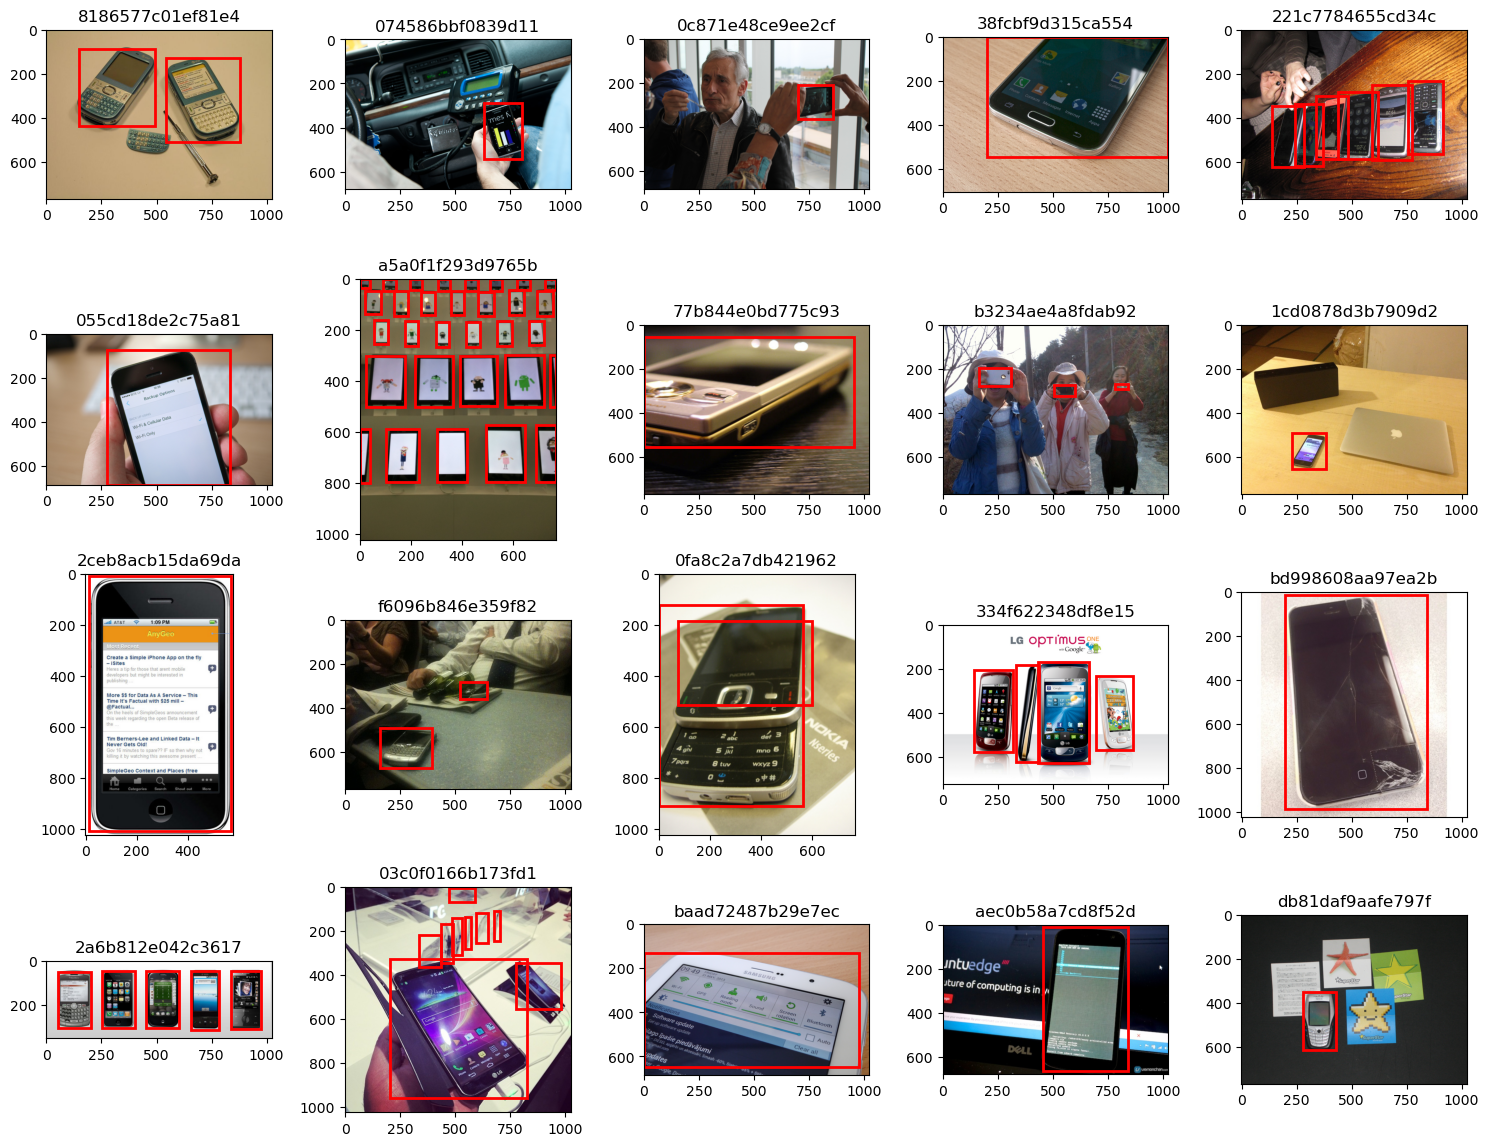

In [13]:
train_images_folder = 'train_images'

# Function to display images with bounding boxes
def display_images_with_boxes(images_to_display, dataset):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4x5 grid of images
    
    for i, ax in enumerate(axes.flat):
        if i < len(images_to_display):
            image_id = images_to_display[i]
            image_path = os.path.join('C:\\ANKITH\\MS\\AI SYSTEMS\\AIS-Project_EngageWise\\train_images\\', image_id + '.jpg')
            
            # Read the image using plt.imread (returns a NumPy array)
            img = plt.imread(image_path)
            
            # Get image dimensions (height, width, channels)
            img_height, img_width = img.shape[:2]
            
            # Filter the dataset for the current image ID
            image_data = dataset[dataset['ImageID'] == image_id]
            
            # Draw bounding boxes
            for _, row in image_data.iterrows():
                # Scale normalized coordinates to actual pixel values
                x1, y1 = int(row['XMin'] * img_width), int(row['YMin'] * img_height)
                x2, y2 = int(row['XMax'] * img_width), int(row['YMax'] * img_height)
                
                # Draw the rectangle
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, 
                                         fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
            
            # Display the image
            ax.imshow(img)
            ax.set_title(image_id)
        else:
            # If no more images, hide the axis
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a random sample of image IDs from the dataset
num_images_to_display = 20
random_image_ids = mobile_train['ImageID'].sample(num_images_to_display).tolist()

# Display the images with bounding boxes
display_images_with_boxes(random_image_ids, mobile_train)

# **MODEL TRAINING**

## **Importing Libraries**

In [14]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os
from PIL import Image

In [15]:
# Checking if the cuda is available 
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [16]:
device

'cuda'

In [17]:
# Load the processed CSV containing only mobile phone data
train_df = pd.read_csv('mobile_train_data.csv')

In [18]:
# Define transformation function
def transformations():
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ]),
        'validation': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
    }
    return data_transforms

In [19]:
# Custom Dataset class for Object Detection
class MobilePhoneDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transforms=None):
        self.annotations = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transforms = transforms

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Get the image ID and image file path
        img_id = self.annotations.iloc[idx]['ImageID']
        img_path = os.path.join('C:/ANKITH/MS/AI SYSTEMS/AIS-Project_EngageWise/train_images', f'{img_id}.jpg')
        
        # Load image
        img = Image.open(img_path).convert("RGB")
        img_width, img_height = img.size

        # Get the corresponding bounding box and label
        image_data = self.annotations[self.annotations['ImageID'] == img_id]
        boxes = []
        labels = []

        for _, row in image_data.iterrows():
            x1 = row['XMin'] * img_width
            y1 = row['YMin'] * img_height
            x2 = row['XMax'] * img_width
            y2 = row['YMax'] * img_height
            boxes.append([x1, y1, x2, y2])
            labels.append(1)  # Assuming mobile phone is labeled as class '1'
        
        # Convert boxes and labels to tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        
        # Create target dictionary
        target = {
            'boxes': boxes,
            'labels': labels
        }
        
        # Apply transformations (if any)
        if self.transforms:
            img = self.transforms(img)
        
        return img, target

In [20]:
# Apply transformations
data_transforms = transformations()

In [21]:
# Paths to images and annotations
img_dir = 'C:/ANKITH/MS/AI SYSTEMS/AIS-Project_EngageWise/train_images/'

In [22]:
# Create Dataset and DataLoader for training and validation
train_dataset = MobilePhoneDataset(
    annotations_file='mobile_train_data.csv', 
    img_dir=img_dir, 
    transforms=data_transforms['train'])


train_loader = DataLoader(
    train_dataset, 
    batch_size=8, 
    shuffle=True, 
    pin_memory=True,
    num_workers=6, 
    collate_fn=lambda x: tuple(zip(*x)))

In [23]:
# Loading pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

#i have freezed the model so that i no need to train the model again
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier head (roi_heads) for the number of classes (1 class for mobile phone + background)
num_classes = 2  # 1 class (mobile phone) + 1 for background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move model to device GPU
model.to(device)

c:\Users\ankit\anaconda3\envs\ais\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ankit\anaconda3\envs\ais\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [24]:
print("Number of trainable params: ", sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6)

Number of trainable params:  0.01025


In [25]:
# Define optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-5)

In [26]:
# Define the training loop
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    running_loss = 0.0
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        
        # Backpropagation
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        running_loss += losses.item()
    
    print(f"Epoch {epoch} Loss: {running_loss/len(data_loader)}")

In [27]:
# Train the model for multiple epochs
num_epochs = 3
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)

Epoch 1 Loss: 0.55964328423
Epoch 2 Loss: 0.39543644542
Epoch 3 Loss: 0.28453152412


In [28]:
# Save the trained model
torch.save(model.state_dict(), "fasterrcnn_mobile_phone_detector.pth")
print("Model Saved")

Model Saved


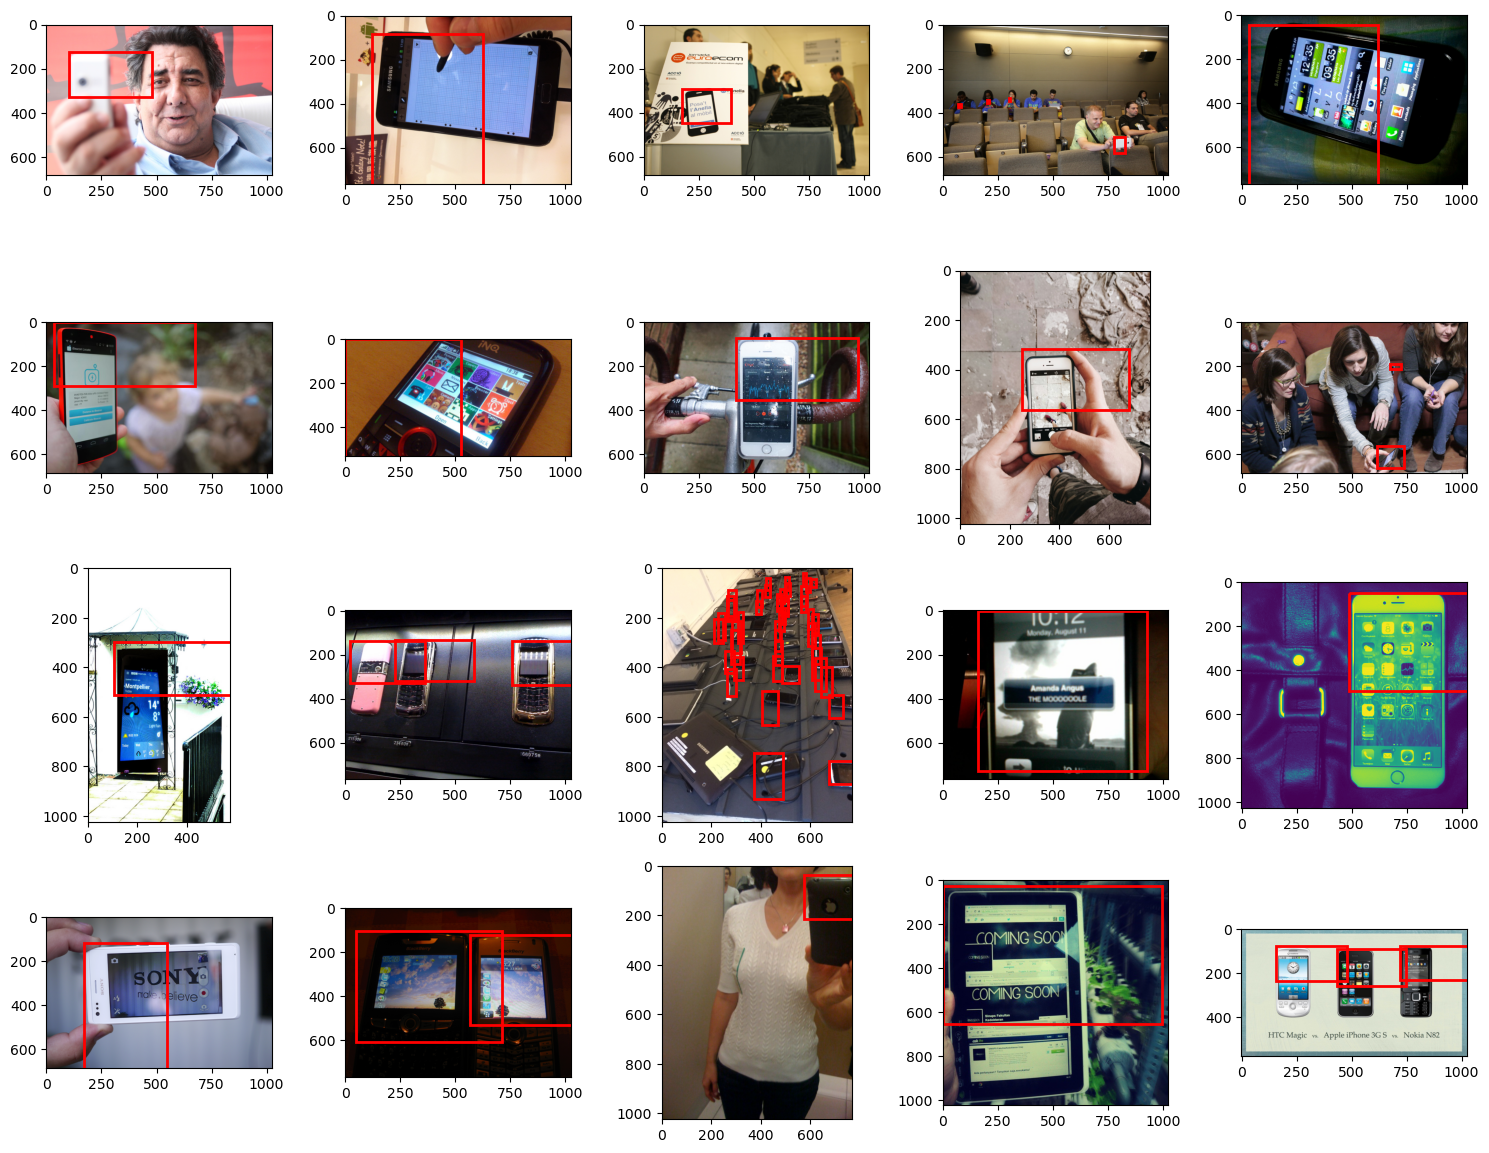

In [30]:
# Load the trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
num_classes = 2  # 1 class (mobile phone) + 1 for background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the trained weights
model.load_state_dict(torch.load("fasterrcnn_mobile_phone_detector.pth"))
model.eval()  # Set the model to evaluation mode

# Move to device (GPU/CPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Transformation for inference (must match training transformations)
def get_inference_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

# Function to perform inference on a single image
def run_inference(image_path, model, device, threshold=0.5):
    # Load and preprocess the image
    img = Image.open(image_path).convert("RGB")
    transform = get_inference_transform()
    img_tensor = transform(img).unsqueeze(0).to(device)  

    # Perform inference
    with torch.no_grad():
        predictions = model(img_tensor)

    # Extract the prediction results (bounding boxes, labels, and scores)
    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Filter out predictions below the confidence threshold
    valid_boxes = boxes[scores >= threshold]
    valid_scores = scores[scores >= threshold]
    valid_labels = labels[scores >= threshold]

    return valid_boxes, valid_scores, valid_labels

# Function to display image with bounding boxes in a subplot
def plot_image_with_boxes(ax, image_path, boxes, scores, labels, class_names):
    img = Image.open(image_path).convert("RGB")
    ax.imshow(img)
    for box, score, label in zip(boxes, scores, labels):
        # Draw the bounding box
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Draw the label and score
        label_name = class_names[label]
        ax.text(x1, y1, f'{label_name}: {score:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    
    ax.axis('off')  # Hide axes

# Class names (for mobile phone, we only have one class)
class_names = {1: 'Mobile Phone'}

test_images_folder = 'C:/ANKITH/MS/AI SYSTEMS/AIS-Project_EngageWise/train_images'

# Get list of image paths from the test dataset folder
image_paths = [os.path.join(test_images_folder, img) for img in os.listdir(test_images_folder) if img.endswith('.jpg')]

# Select random images from the test folder (adjust based on available images)
num_images_to_display = 20
random_image_paths = np.random.choice(image_paths, num_images_to_display, replace=False)

# Set up a grid for displaying images (4x5)
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# Loop through the images and perform inference
for i, ax in enumerate(axes.flat):
    if i < len(random_image_paths):
        # Perform inference on the image
        image_path = random_image_paths[i]
        boxes, scores, labels = run_inference(image_path, model, device)

        # Plot the image with bounding boxes
        plot_image_with_boxes(ax, image_path, boxes, scores, labels, class_names)

plt.tight_layout()
plt.show()

# **The model is not at all trained perfectly and need to trained more to get the perfect prediction.**